# Relatório - Desafio Casa dos Ventos - GED-20

### Etapas

__1. Sample__: importação e geração das bases dos dados que serão utilizadas;

__2. Explore__: análise exploratória dos dados;

__3. Modify__: transformação dos dados (geração de novas features) e divisão dos dados em conjuntos de treino e teste dos modelos.

### Sample

#### Importando as bibliotecas

In [1]:
import pandas as pd
from data_import import *

__data_import.py__

```python
import pandas as pd

def separate_plants_ts():
    merge = pd.read_csv("../data/merge.csv")
    for code in merge["ana_code"].unique():
        path = f"../data/ts-{code}.csv"
        ts = merge[merge["ana_code"] == code].sort_values(by="date_ref").reset_index(drop=True)
        ts.index = pd.to_datetime(ts["date_ref"])
        ts = ts.drop(["date_ref", "ana_code"], axis=1)
        ts.to_csv(path)

def get_plants():
    df = pd.read_csv("../data/merge.csv")
    return  df["ana_code"].unique()

def import_precipitation_ts():
    df_dict = {}
    for plant in get_plants():
        df_dict[plant] = pd.read_csv(f"../data/ts-{plant}.csv", index_col=0)
    return df_dict
```

#### Gerando os dados a partir de merge.csv

In [3]:
separate_plants_ts()

#### Importando os dados

In [4]:
ts_dict = import_precipitation_ts()
plants = get_plants()

In [4]:
plants

array(['PSATCNV', 'PSATFUR', 'PSATFZA', 'PSATIMBR', 'PSATITP', 'PSATJIRA',
       'PSATLAJ', 'PSATPIME'], dtype=object)

### Explore

Usinas selecionadas:

- Grande: Furnas- PSATFUR

- Paranaíba: Emborcação- PSATEMB ou Itumbiara- PSATIMBR

- Paraná: Itaipu- PSATITP

- Iguaçu: Foz do Areia (ou G. B. Munhoz)- PSATFZA

- Uruguai: Campos Novos- PSATCNV

- Tocantins: Lajeado- PSATLAJ

- Madeira: Jirau- PSATJIRA

- Xingu: Pimental- PSATPIME

#### Importando bibliotecas

In [5]:
from data_analysis import *

__data_analysis.py__

```python
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image

def plot_plant_ts_daily(ts_dict, plant="PSATCNV", close=True):
    plt.figure(figsize=(8,6))
    ts_dict[plant].plot()
    plt.title(f"Precipitação média diária para {plant}")
    folder_path = f"figs-{plant}/"
    if not os.path.exists(folder_path):
        os.mkdir(folder_path)
    save_path = f"{folder_path}daily_mean.png"
    plt.savefig(save_path)
    if close:
        plt.close()
    return save_path
       
def plot_plant_ts_accumulated_by_month(ts_dict, plant="PSATCNV", close=True):
    plt.figure(figsize=(8, 6))
    ts = ts_dict[plant]
    df = ts.copy()
    df.index = pd.to_datetime(df.index)
    df = df.resample('M').sum()
    df.plot(color="darkblue", legend=False)
    plt.title(f"Precipitação média acumulada por mês para {plant}")
    plt.xlabel("Data de referência")
    folder_path = f"figs-{plant}/"
    if not os.path.exists(folder_path):
        os.mkdir(folder_path)
    save_path = f"{folder_path}accumulated_by_month.png"
    plt.savefig(save_path)
    if close:
        plt.close()
    return save_path
    
def plot_plant_ts_accumulated_by_year(ts_dict, plant="PSATCNV", close=True):
    plt.figure(figsize=(8,6))
    ts = ts_dict[plant]
    df = ts.copy()
    df.index = pd.to_datetime(df.index)
    df = df[df.index < "2024-01-01"]
    df = df.resample('Y').sum()
    df.plot(color="darkblue", legend=False)
    plt.title(f"Precipitação média acumulada por ano para {plant}")
    plt.xlabel("Data de referência")
    plt.grid()
    folder_path = f"figs-{plant}/"
    if not os.path.exists(folder_path):
        os.mkdir(folder_path)
    save_path = f"{folder_path}accumulated_by_year.png"
    plt.savefig(save_path)
    if close:
        plt.close()
    return save_path
    
def plot_plant_ts_mean_by_month(ts_dict, plant="PSATCNV", close=True):
    plt.figure(figsize=(8,6))
    ts = ts_dict[plant]
    df = ts.copy()
    df.index = pd.to_datetime(df.index)
    df = df.resample('M').sum()
    df = df.groupby(df.index.month).mean()
    plt.bar(df.index, df["mean_precipitation"], color="darkblue")
    plt.xticks([i+1 for i in range(len(df.index))], list(df.index))
    plt.title(f"Média das precipitações acumuladas por mês para {plant} ao longo dos anos")
    plt.xlabel("Data de referência", fontsize=12)
    folder_path = f"figs-{plant}/"
    if not os.path.exists(folder_path):
        os.mkdir(folder_path)
    save_path = f"{folder_path}mean-by-month.png"
    plt.savefig(save_path)
    if close:
        plt.close()
    return save_path

def precipitation_plots(ts_dict, plant="PSATCNV"):
    save_path0 = plot_plant_ts_daily(ts_dict, plant)
    save_path1 = plot_plant_ts_accumulated_by_month(ts_dict, plant)
    save_path2 = plot_plant_ts_accumulated_by_year(ts_dict, plant)
    save_path3 = plot_plant_ts_mean_by_month(ts_dict, plant)
    fig, axs= plt.subplots(2, 2, figsize=(20, 18))
    img0 = Image.open(save_path0) 
    img1 = Image.open(save_path1)
    img2 = Image.open(save_path2)
    img3 = Image.open(save_path3)
    axs[0, 0].imshow(img0)
    axs[0, 1].imshow(img1)
    axs[1, 0].imshow(img2)
    axs[1, 1].imshow(img3)
    for ax in axs.flatten():
        ax.axis("off")
    folder_path = f"figs-{plant}/"
    if not os.path.exists(folder_path):
        os.mkdir(folder_path)
    save_path = f"{folder_path}all.png"
    plt.savefig(save_path, bbox_inches='tight', pad_inches=0)
    plt.show()
```

#### Análise das séries temporais a partir dos gráficos

__PSATFUR - Furnas__

In [6]:
df = ts_dict["PSATFUR"]

In [7]:
df.shape

(8707, 1)

In [8]:
begin_date = df.head(1).index[0]
end_date = df.tail(1).index[0]

print(f"Data de início das medições: {begin_date}")
print(f"Data de fim das medições: {end_date}")

Data de início das medições: 2000-06-02
Data de fim das medições: 2024-04-03


In [9]:
df.describe()

,mean_precipitation
count,8707.000000
mean,3.479725
std,6.487503
min,0.000000
25%,0.000000
50%,0.245640
75%,4.190044
max,60.944767


Por meio do gráfico de precipitação média acumulada por ano, verifica-se tendência decrescente de chuvas entre 2009 e 2014, bem como tendência de crescimento entre 2015 e 2023. 

Além disso, por meio do gráfico de barras dos meses, nota-se que a maior quantidade de chuvas ocorre no começo e no fim do ano, de outubro a dezembro e de janeiro a março.

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

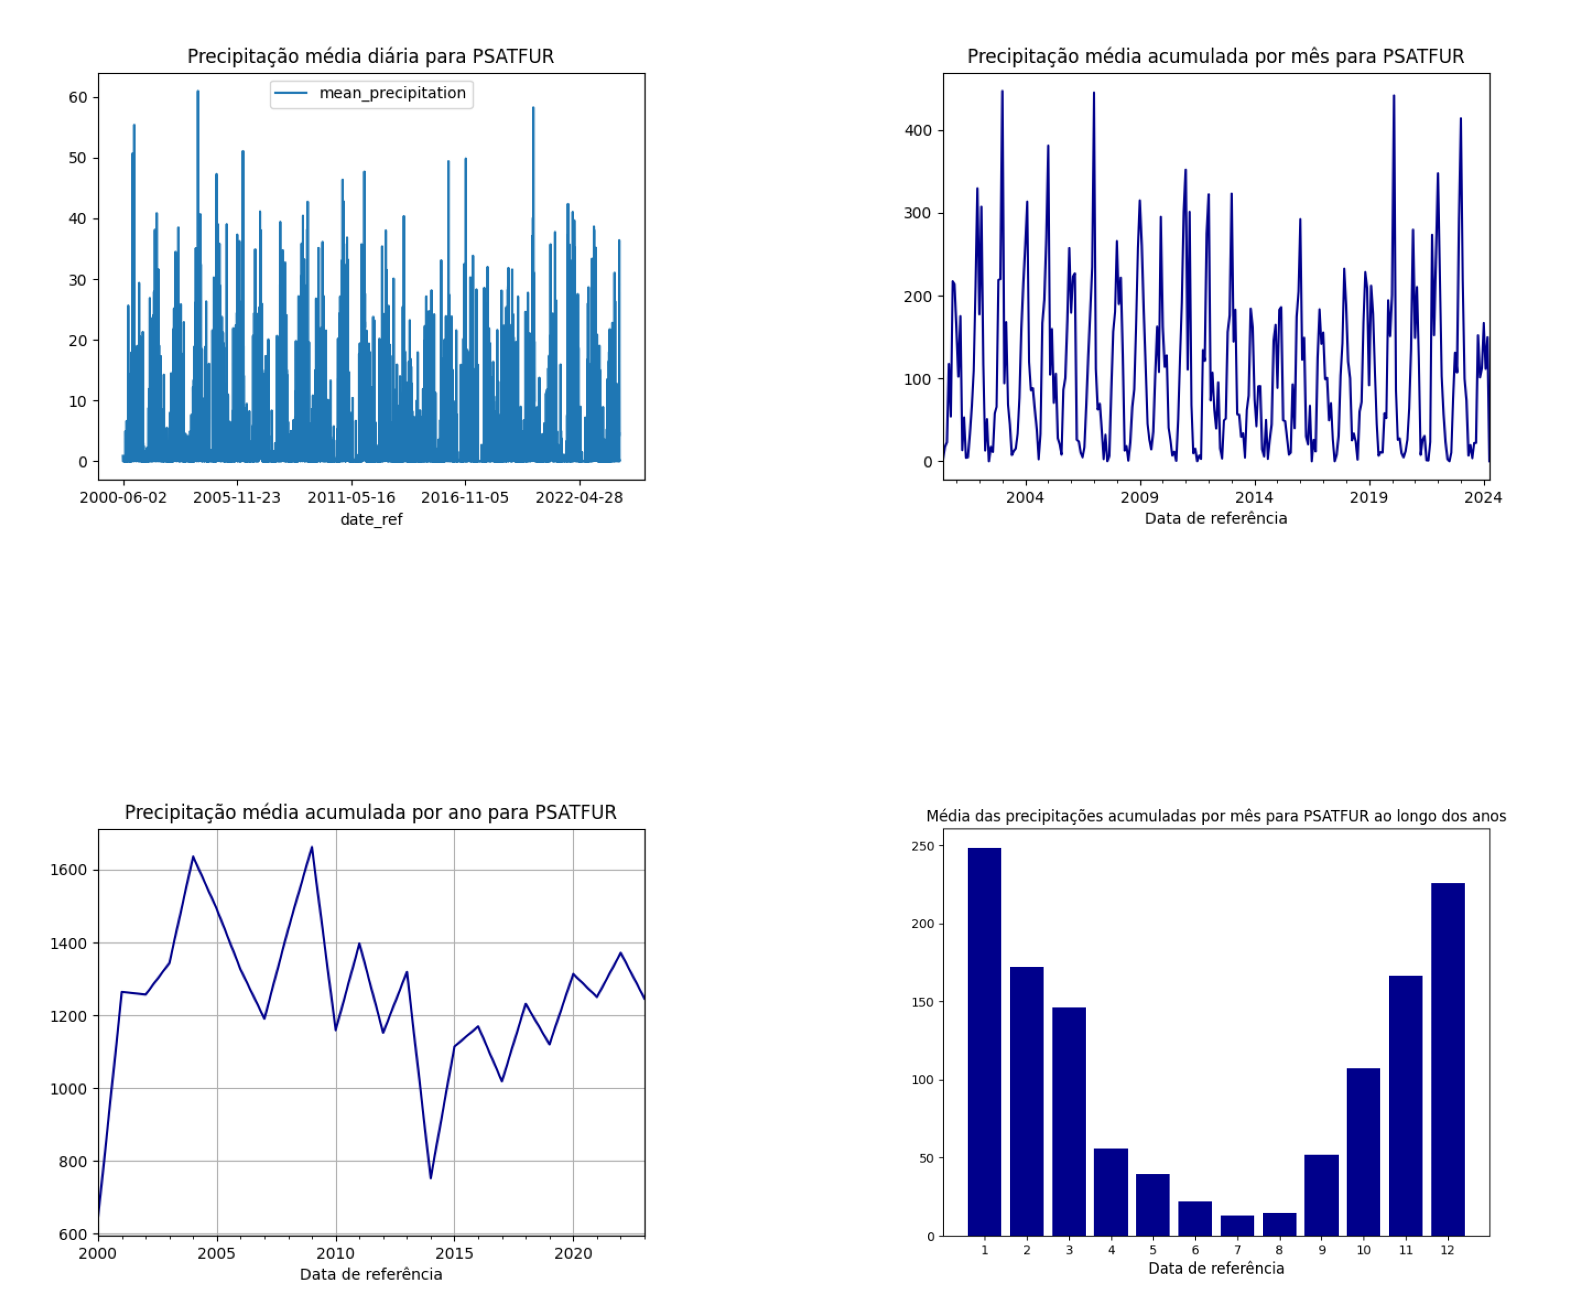

In [11]:
precipitation_plots(ts_dict, "PSATFUR")

__PSATIMBR - Itumbiara__

In [12]:
df = ts_dict["PSATIMBR"]

In [13]:
df.shape

(8707, 1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8707 entries, 2000-06-02 to 2024-04-03
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   mean_precipitation  8707 non-null   float64
dtypes: float64(1)
memory usage: 136.0+ KB


In [15]:
begin_date = df.head(1).index[0]
end_date = df.tail(1).index[0]

print(f"Data de início das medições: {begin_date}")
print(f"Data de fim das medições: {end_date}")

Data de início das medições: 2000-06-02
Data de fim das medições: 2024-04-03


In [16]:
df.describe()

,mean_precipitation
count,8707.000000
mean,3.549486
std,6.380123
min,0.000000
25%,0.000000
50%,0.274746
75%,4.407678
max,54.267132


Por meio do gráfico de precipitação média acumulada por ano, verifica-se tendência de manutenção da quantidade de chuvas ao longo dos anos, com poucas variações médias entre eles.

Além disso, por meio do gráfico de barras dos meses, nota-se que a maior quantidade de chuvas ocorre no começo e no fim do ano, de outubro a dezembro e de janeiro a março.

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

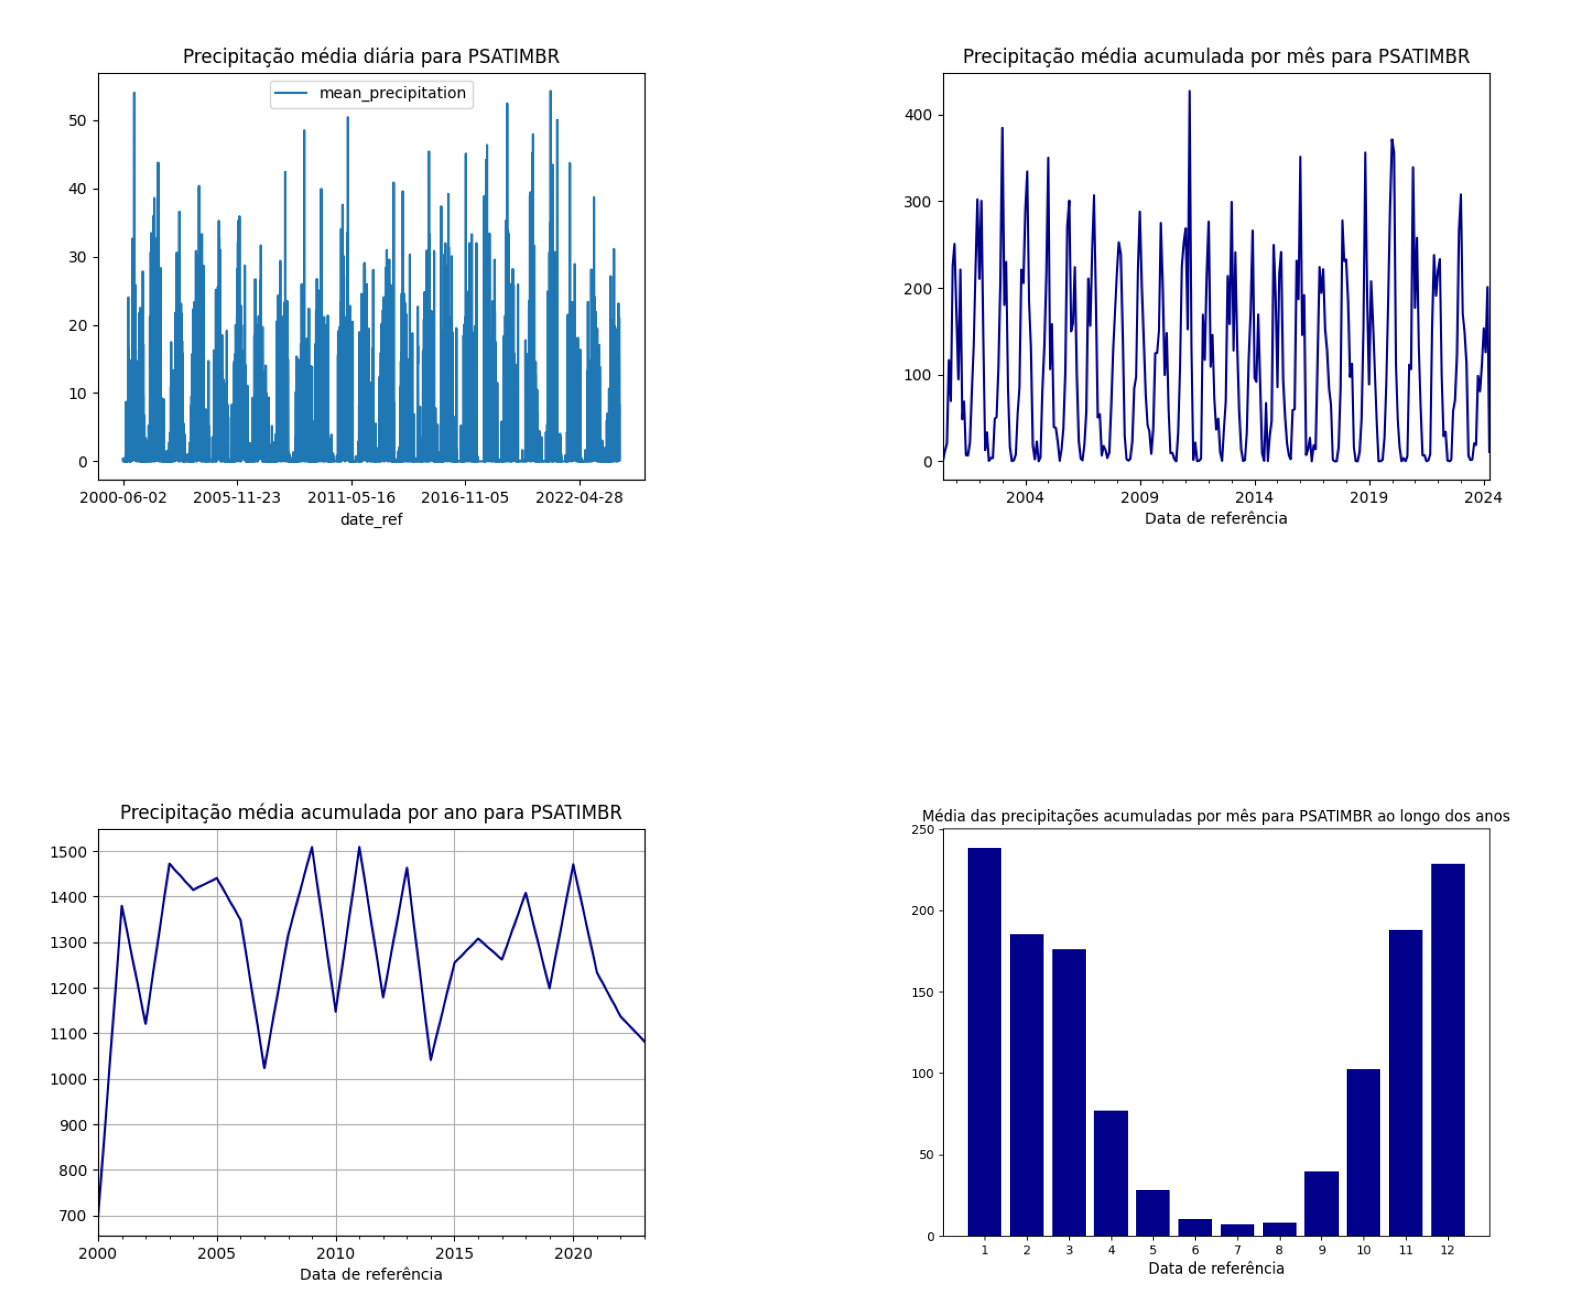

In [17]:
precipitation_plots(ts_dict, "PSATIMBR")

__PSATITP - Itaipu__

In [18]:
df = ts_dict["PSATITP"]

In [19]:
df.shape

(8707, 1)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8707 entries, 2000-06-02 to 2024-04-03
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   mean_precipitation  8707 non-null   float64
dtypes: float64(1)
memory usage: 136.0+ KB


In [21]:
begin_date = df.head(1).index[0]
end_date = df.tail(1).index[0]

print(f"Data de início das medições: {begin_date}")
print(f"Data de fim das medições: {end_date}")

Data de início das medições: 2000-06-02
Data de fim das medições: 2024-04-03


In [22]:
df.describe()

,mean_precipitation
count,8707.000000
mean,4.125419
std,8.131489
min,0.000000
25%,0.001144
50%,0.286613
75%,4.461098
max,80.157895


Por meio do gráfico de precipitação média acumulada por ano, verifica-se tendência de manutenção da quantidade de chuvas, no geral. No entanto, nota-se que em 2008 e em 2020, a quantidade de chuvas foi abaixo do normal.

Além disso, por meio do gráfico de barras dos meses, nota-se que a maior quantidade de chuvas ocorre nos meses de outubro a fevereiro, mas principalmente no mês de outubro.

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

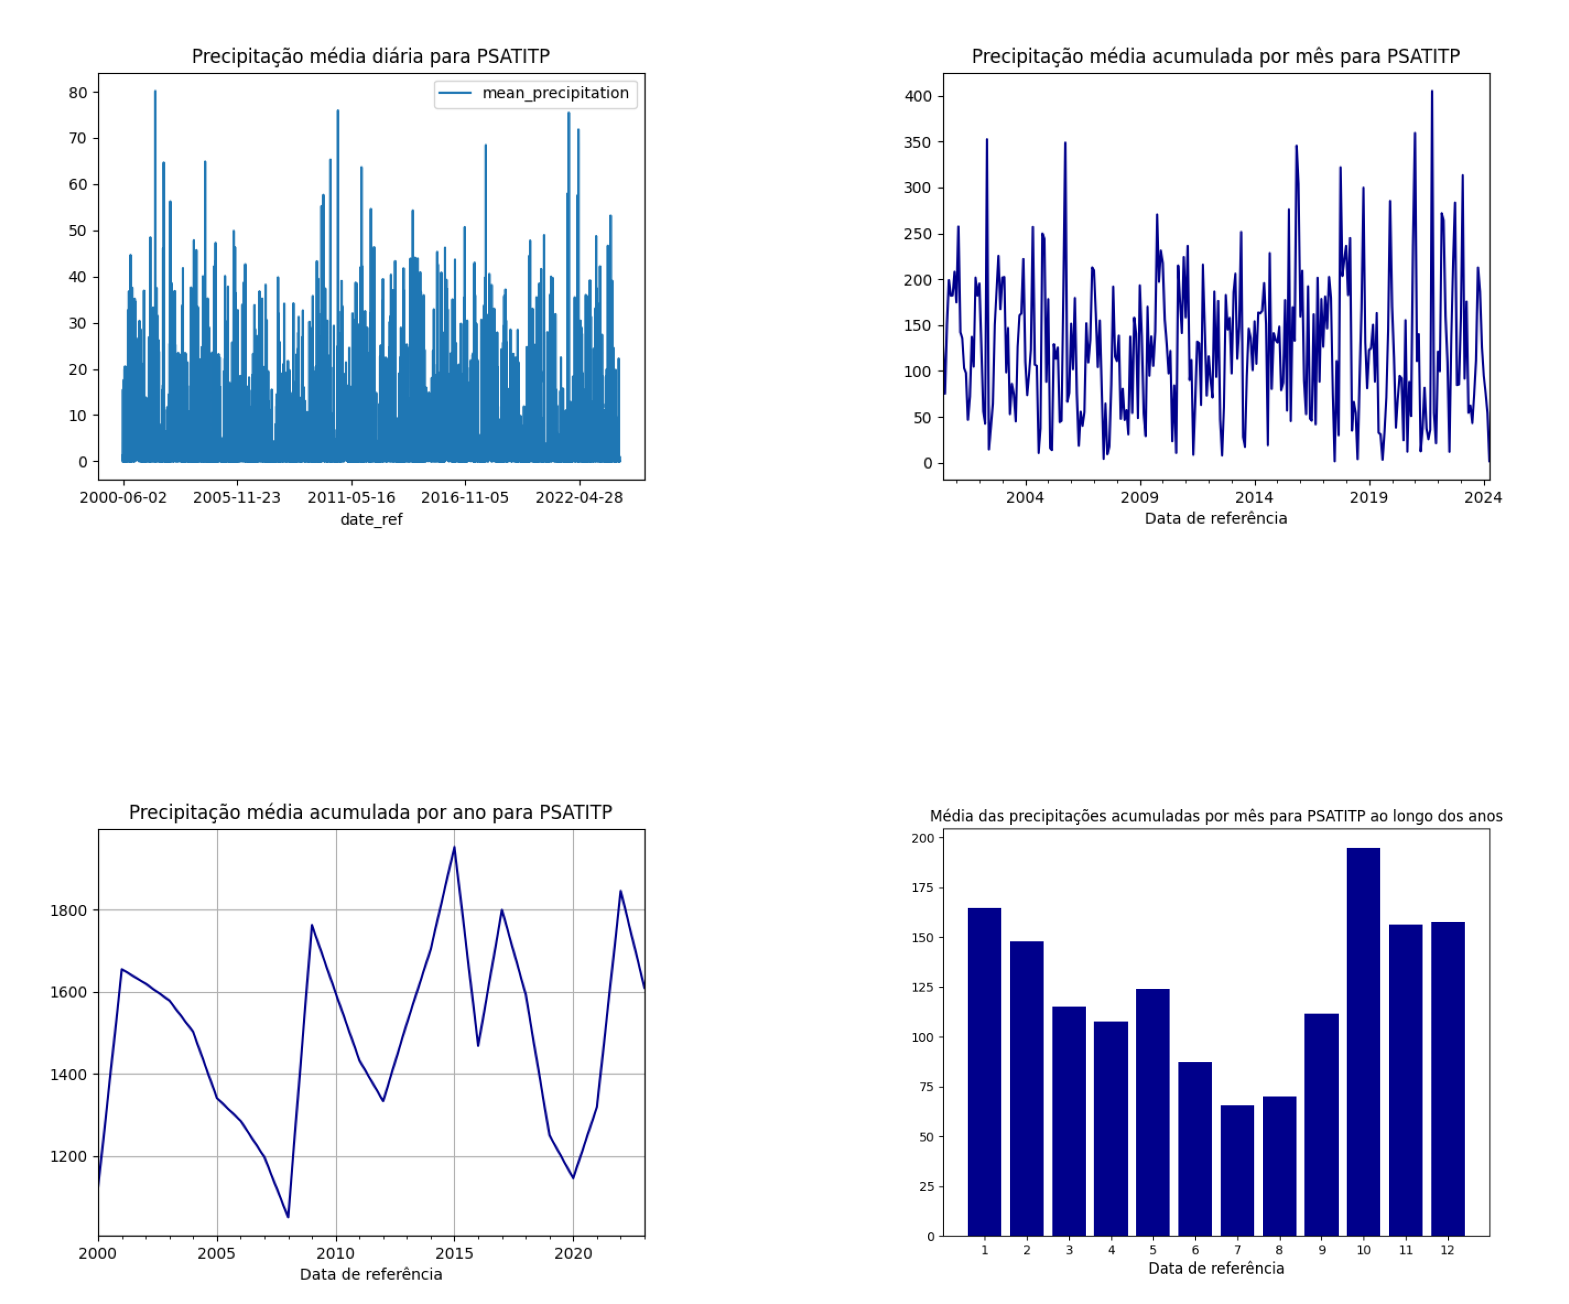

In [23]:
precipitation_plots(ts_dict, "PSATITP")

__PSATFZA - Foz do Areia__

In [24]:
df = ts_dict["PSATFZA"]

In [25]:
df.shape

(8707, 1)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8707 entries, 2000-06-02 to 2024-04-03
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   mean_precipitation  8707 non-null   float64
dtypes: float64(1)
memory usage: 136.0+ KB


In [27]:
begin_date = df.head(1).index[0]
end_date = df.tail(1).index[0]

print(f"Data de início das medições: {begin_date}")
print(f"Data de fim das medições: {end_date}")

Data de início das medições: 2000-06-02
Data de fim das medições: 2024-04-03


In [28]:
df.describe()

,mean_precipitation
count,8707.000000
mean,5.195911
std,11.307735
min,0.000000
25%,0.000000
50%,0.169643
75%,4.502976
max,109.443452


Por meio do gráfico de precipitação média acumulada por ano, verifica-se tendência de manutenção da quantidade de chuvas, no geral. No entanto, nota-se que em 2012 e em 2021, a quantidade de chuvas foi abaixo do normal, e que em 2015 foi bem acima do normal.

Além disso, por meio do gráfico de barras dos meses, nota-se que a maior quantidade de chuvas ocorre no mês de outubro, com boa constância na quantidade de chuvas ao longo de todos os meses do ano.

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

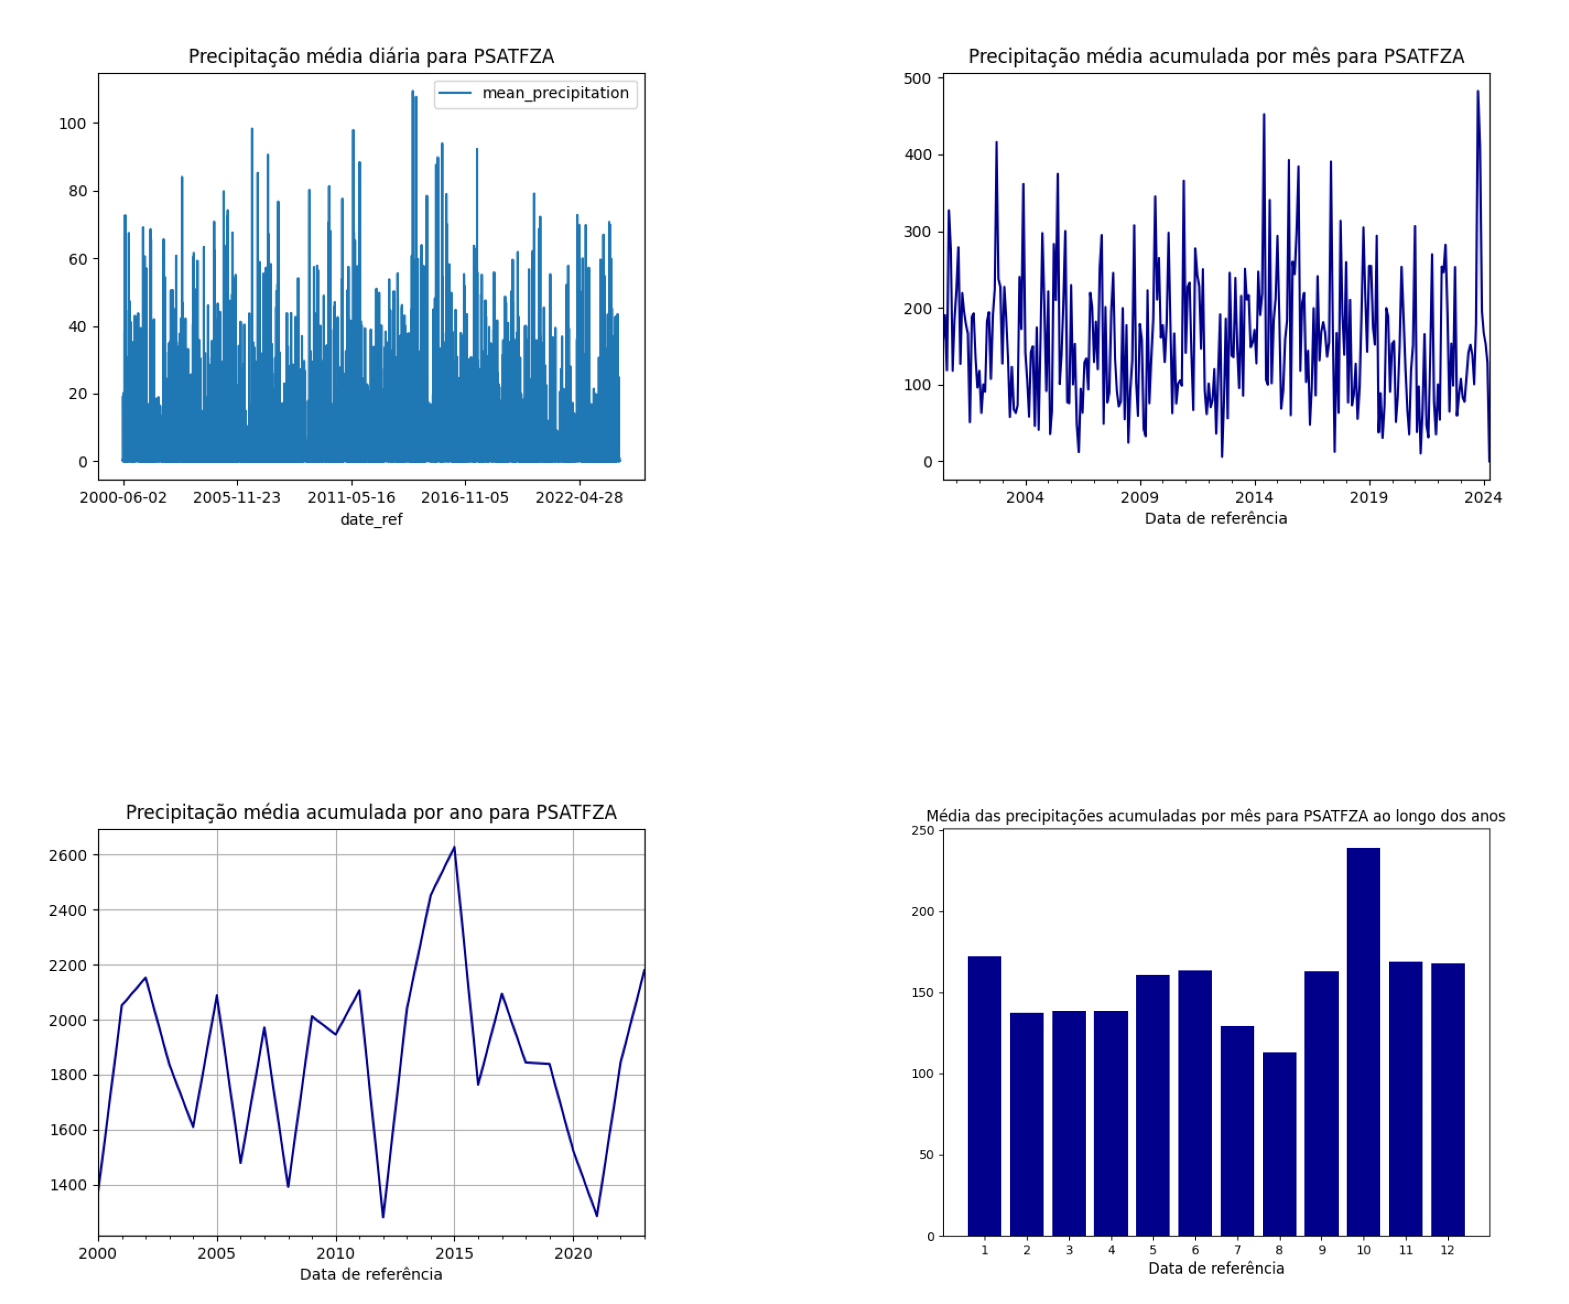

In [29]:
precipitation_plots(ts_dict, "PSATFZA")

__PSATCNV - Campos Novos__

In [30]:
df = ts_dict["PSATCNV"]

In [31]:
df.shape

(8707, 1)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8707 entries, 2000-06-02 to 2024-04-03
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   mean_precipitation  8707 non-null   float64
dtypes: float64(1)
memory usage: 136.0+ KB


In [33]:
begin_date = df.head(1).index[0]
end_date = df.tail(1).index[0]

print(f"Data de início das medições: {begin_date}")
print(f"Data de fim das medições: {end_date}")

Data de início das medições: 2000-06-02
Data de fim das medições: 2024-04-03


In [34]:
df.describe()

,mean_precipitation
count,8707.000000
mean,4.733811
std,9.314434
min,0.000000
25%,0.051357
50%,0.547481
75%,5.090843
max,100.245155


Por meio do gráfico de precipitação média acumulada por ano, verifica-se tendência de manutenção da quantidade de chuvas, no geral. No entanto, nota-se que em 2003, 2004, 2012 e 2020, a quantidade de chuvas foi bem abaixo do normal, e que em 2011, 2014 e 2015 foi bem acima do normal.

Além disso, por meio do gráfico de barras dos meses, nota-se que a maior quantidade de chuvas ocorre no mês de outubro, com boa constância na quantidade de chuvas ao longo de todos os meses do ano.

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

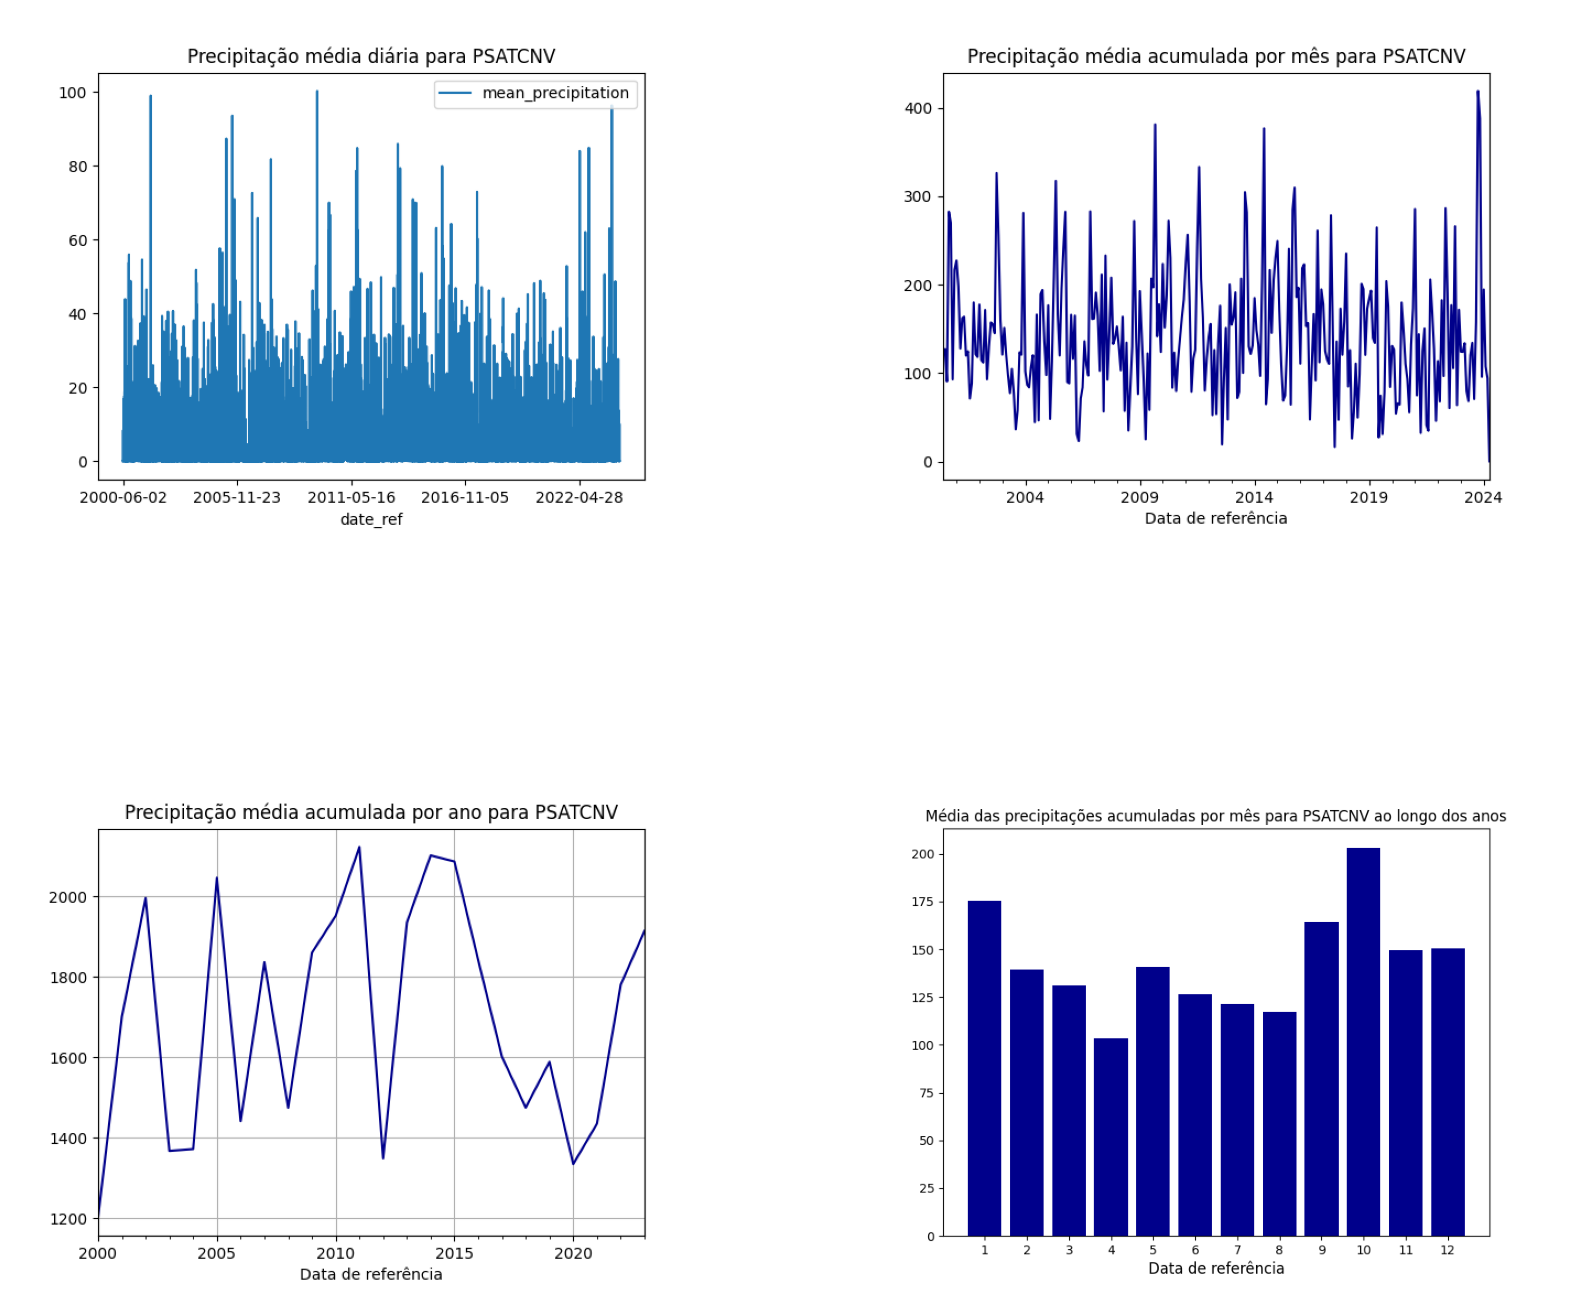

In [35]:
precipitation_plots(ts_dict, "PSATCNV")

__PSATLAJ - Lajeado__

In [36]:
df = ts_dict["PSATLAJ"]

In [37]:
df.shape

(8707, 1)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8707 entries, 2000-06-02 to 2024-04-03
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   mean_precipitation  8707 non-null   float64
dtypes: float64(1)
memory usage: 136.0+ KB


In [39]:
begin_date = df.head(1).index[0]
end_date = df.tail(1).index[0]

print(f"Data de início das medições: {begin_date}")
print(f"Data de fim das medições: {end_date}")

Data de início das medições: 2000-06-02
Data de fim das medições: 2024-04-03


In [40]:
df.describe()

,mean_precipitation
count,8707.000000
mean,3.400978
std,5.466467
min,0.000000
25%,0.000794
50%,0.674342
75%,4.849138
max,59.791856


Por meio do gráfico de precipitação média acumulada por ano, verifica-se tendência de manutenção da quantidade de chuvas ao longo dos anos, com poucas variações médias entre eles.

Além disso, por meio do gráfico de barras dos meses, nota-se que a maior quantidade de chuvas ocorre no começo e no fim do ano, de outubro a dezembro e de janeiro a março. Ademais, nota-se grande diminuição na quantidade de chuvas no meio do ano, nos meses 6, 7 e 8, principalmente.

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

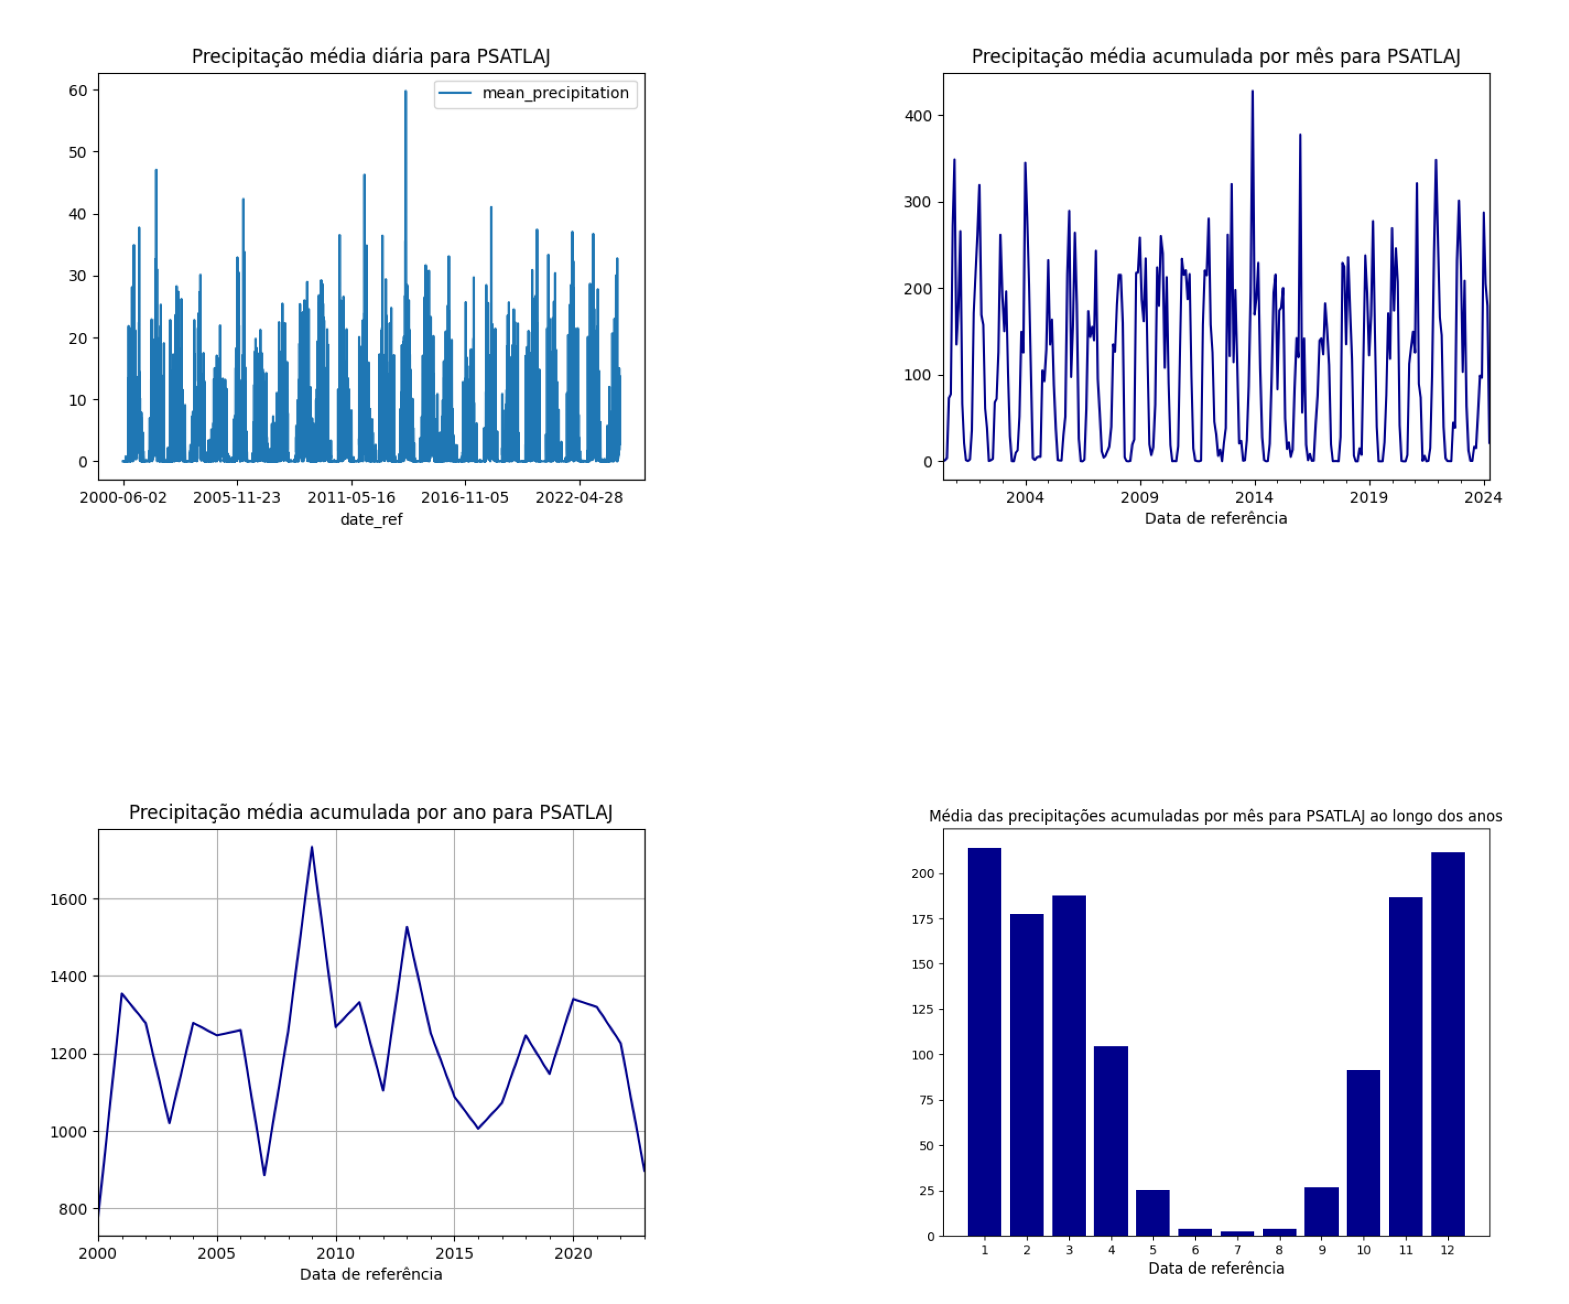

In [41]:
precipitation_plots(ts_dict, "PSATLAJ")

__PSATJIRA - Jirau__

In [42]:
df = ts_dict["PSATJIRA"]

In [43]:
df.shape

(8707, 1)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8707 entries, 2000-06-02 to 2024-04-03
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   mean_precipitation  8707 non-null   float64
dtypes: float64(1)
memory usage: 136.0+ KB


In [45]:
begin_date = df.head(1).index[0]
end_date = df.tail(1).index[0]

print(f"Data de início das medições: {begin_date}")
print(f"Data de fim das medições: {end_date}")

Data de início das medições: 2000-06-02
Data de fim das medições: 2024-04-03


In [46]:
df.describe()

,mean_precipitation
count,8707.000000
mean,4.537072
std,6.051249
min,0.000000
25%,0.275767
50%,2.106840
75%,6.426297
max,52.488208


Por meio do gráfico de precipitação média acumulada por ano, verifica-se tendência de manutenção da quantidade de chuvas ao longo dos anos, com poucas variações médias entre eles.

Além disso, por meio do gráfico de barras dos meses, nota-se que a maior quantidade de chuvas ocorre no começo e no fim do ano, de outubro a dezembro e de janeiro a março. Ademais, nota-se grande diminuição na quantidade de chuvas no meio do ano, nos meses 6, 7 e 8, principalmente.

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

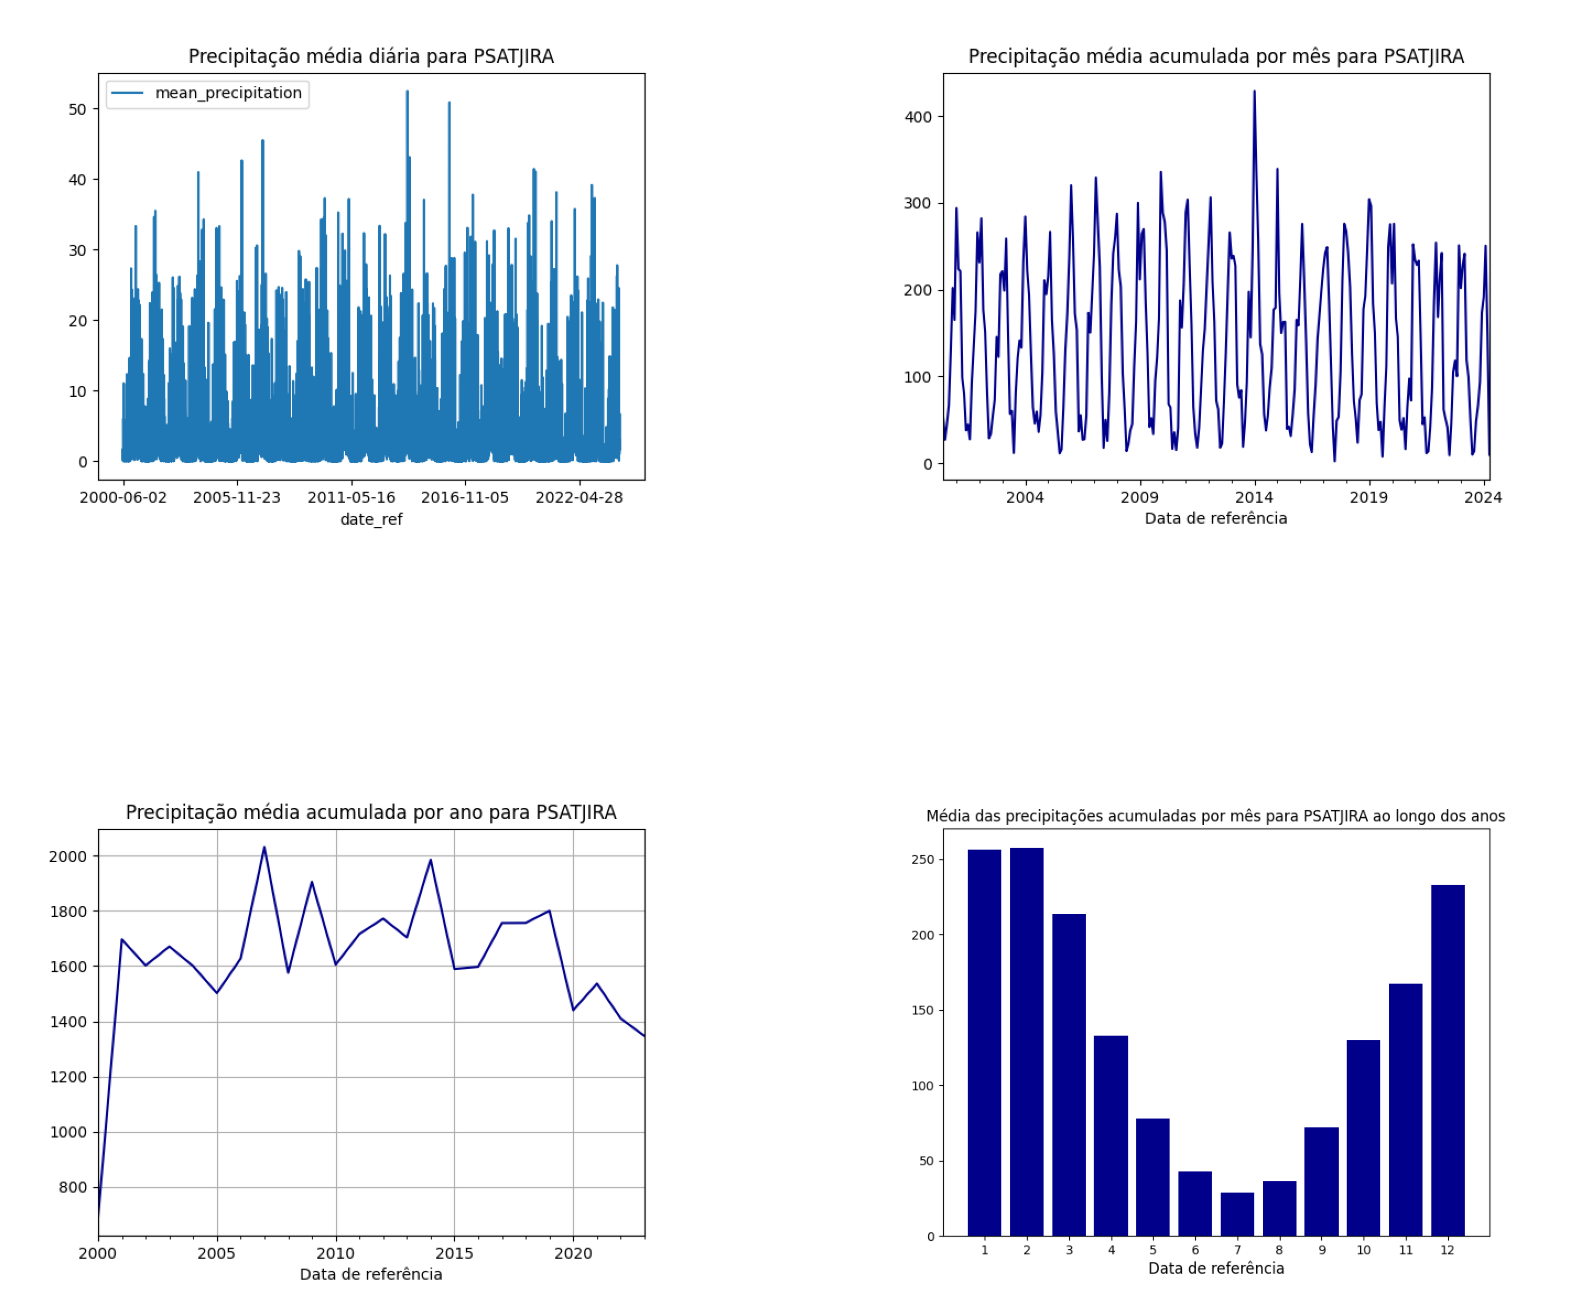

In [47]:
precipitation_plots(ts_dict, "PSATJIRA")

__PSATPIME - Pimental__

In [48]:
df = ts_dict["PSATPIME"]

In [49]:
df.shape

(8707, 1)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8707 entries, 2000-06-02 to 2024-04-03
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   mean_precipitation  8707 non-null   float64
dtypes: float64(1)
memory usage: 136.0+ KB


In [51]:
begin_date = df.head(1).index[0]
end_date = df.tail(1).index[0]

print(f"Data de início das medições: {begin_date}")
print(f"Data de fim das medições: {end_date}")

Data de início das medições: 2000-06-02
Data de fim das medições: 2024-04-03


In [52]:
df.describe()

,mean_precipitation
count,8707.000000
mean,4.902055
std,6.164975
min,0.000000
25%,0.518331
50%,2.669169
75%,6.989544
max,68.006166


Por meio do gráfico de precipitação média acumulada por ano, verifica-se tendência de manutenção da quantidade de chuvas ao longo dos anos, com poucas variações médias entre eles.

Além disso, por meio do gráfico de barras dos meses, nota-se que a maior quantidade de chuvas ocorre principalmente no começo ano, de janeiro a março. Ademais, nota-se grande diminuição na quantidade de chuvas no meio do ano, nos meses 6, 7 e 8, principalmente, e tendência de aumento gradativo a partir de setembro.

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

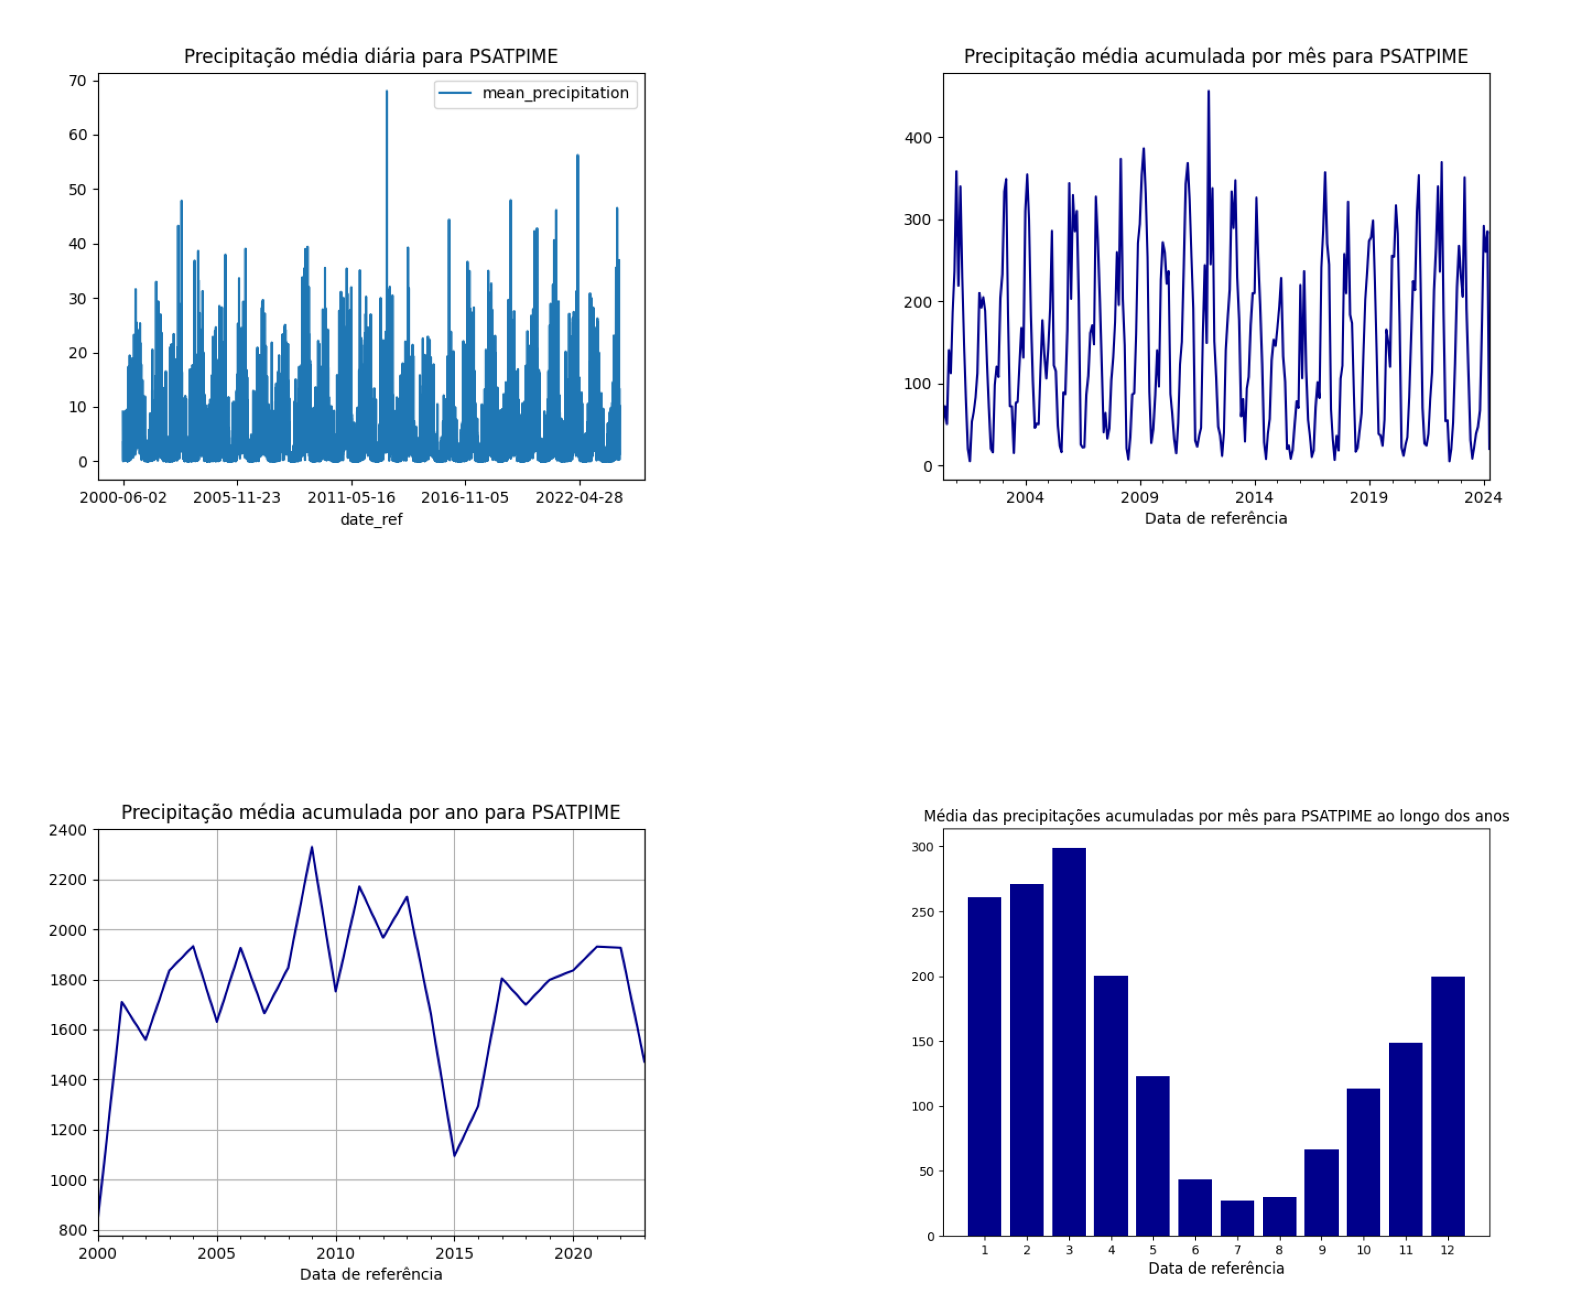

In [53]:
precipitation_plots(ts_dict, "PSATPIME")

### Modify

```python
def separate_predictions_plants_ts(name: str):
    df = pd.read_csv(f"../data/{name}.csv")
    df['date_ref'] = pd.to_datetime(df['date_ref'])
    df['date_forecast'] = pd.to_datetime(df['date_forecast'])
    df['date_diff'] = (df['date_forecast'] - df['date_ref']).dt.days

    pivot_df = df.pivot_table(index=['ana_code', 'date_ref'],
                              columns='date_diff',
                              values='mean_precipitation',
                              fill_value=0)
    transformed_df = pivot_df.reset_index()
    transformed_df.columns.name = None  # Remove the column name (date_diff)
    days_columns = [f'{name}_d+{col}' for col in transformed_df.columns[2:]]
    transformed_df.columns = ['ana_code', 'date_ref'] + days_columns

    for code in transformed_df["ana_code"].unique():
        path = f"../data/ts-{code}.csv"
        ts = pd.read_csv(path)
        ts['date_ref'] = pd.to_datetime(ts['date_ref'])
        code_df = transformed_df[transformed_df["ana_code"] == code].drop(columns='ana_code')
        merged = pd.merge(code_df, ts, on='date_ref', how='inner')
        merged.to_csv(path, index=False)
```

In [1]:
import pandas as pd
from data_import import *

In [2]:
separate_predictions_plants_ts('cfs')
separate_predictions_plants_ts('gefs')